In [5]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
from numpy import genfromtxt
from astropy import units as u
import pickle
from matplotlib import gridspec
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.font_manager import FontProperties
from numpy.random import rand
import pandas as pd
from scipy.optimize import curve_fit

In [6]:
%matplotlib inline

pi = np.pi 

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
print('def: find_nearest(array, value)')

def powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    shifted5=amp5*shift(sinepw,shift5)
    shifted6=amp6*shift(sinepw,shift6)
    shifted7=amp1*shift(sinepw,shift7)
    shifted8=amp2*shift(sinepw,shift8)
    shifted9=amp3*shift(sinepw,shift9)
    shifted10=amp4*shift(sinepw,shift10)
    return shifted1+shifted2+shifted3+shifted4+shifted5+shifted6+shifted7+shifted8+shifted9+shifted10
print('def: powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10)')

def powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    shifted5=amp5*shift(sinepw,shift5)
    shifted6=amp6*shift(sinepw,shift6)
    return shifted1+shifted2+shifted3+shifted4+shifted5+shifted6
print('def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)')

def powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    return shifted1+shifted2+shifted3+shifted4
print('def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)')
      
def powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    return shifted1+shifted2+shifted3
print('def: powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3)')
      
def powerfuncsingle(hpp,amp1,shift1):
    shifted1=amp1*shift(sinepw,shift1)
    return shifted1
print('def: powerfuncsingle(hpp,amp1,shift1)')

import os
from os.path import join
array = os.path.abspath('').split('/')
homedir = '/'
for i in range(1,7):
   homedir = join(homedir, array[i])
homedir

def: find_nearest(array, value)
def: powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10)
def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)
def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)
def: powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3)
def: powerfuncsingle(hpp,amp1,shift1)


'/Users/nguyendat/Documents/GitHub/aroma/2025jwst_brittany_data'

Shapes: errs, fluxs, lams: (44, 1299) (44, 1299)
lams[0]: [2.84852295 2.85032182 2.85212069 ... 5.17857709 5.18037147        nan]
fluxs:    2.871908  2.873707  2.875506  2.877305  2.879104      2.880903  \
0       0.0       0.0       0.0       0.0       0.0  1.808831e-12   
1       0.0       0.0       0.0       0.0       0.0  1.652340e-12   
2       0.0       0.0       0.0       0.0       0.0 -1.984632e-12   
3       0.0       0.0       0.0       0.0       0.0  4.593040e-14   
4       0.0       0.0       0.0       0.0       0.0  2.273322e-12   

       2.882702      2.884501      2.886299      2.888098  ...      5.162427  \
0  1.836369e-12  1.707473e-12  1.081268e-12  7.351999e-13  ...  3.596057e-10   
1  1.443826e-12  8.526532e-13  1.261903e-12  1.551518e-13  ...  3.572353e-10   
2  1.132129e-12  2.062765e-12  2.676360e-12  1.216635e-12  ...  3.512810e-10   
3  7.644236e-13 -6.589217e-13  1.706289e-12 -7.642860e-13  ...  3.549474e-10   
4  9.638166e-13  2.349834e-12  5.944406e-13  1.5

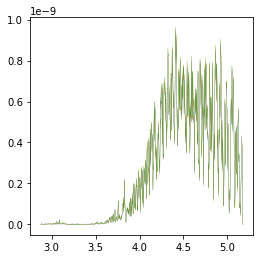

In [7]:
# WISE 0855 data
errs, fluxs, lams = [],[],[]

errs = np.load('/Users/nguyendat/Documents/GitHub/aroma/2025jwst_brittany_data/wise0855_custom_extraction_flux_errs_masked_11102024.npy')
fluxs = np.load('/Users/nguyendat/Documents/GitHub/aroma/2025jwst_brittany_data/wise0855_custom_extraction_fluxes_masked_11102024.npy')
lams = np.load('/Users/nguyendat/Documents/GitHub/aroma/2025jwst_brittany_data/wise0855_custom_extraction_lams_masked_11102024.npy')

print('Shapes: errs, fluxs, lams:', fluxs.shape, lams.shape)
plt.figure(figsize=(4,4))
plt.plot(lams[0], fluxs[0], alpha=1, lw=0.2)
plt.plot(lams[20], fluxs[20], alpha=1, lw=0.2)
plt.plot(lams[40], fluxs[40], alpha=1, lw=0.2)

errs = pd.DataFrame(errs, columns=lams[0])
fluxs = pd.DataFrame(fluxs, columns=lams[0])

fluxs = fluxs.dropna(axis=1, how='all').fillna(0)
errs = errs.dropna(axis=1, how='all').fillna(0)

print('lams[0]:', lams[0])
print('fluxs:', fluxs.head()) 

[2.932, 3.047, 3.163, 3.278, 3.393, 3.508, 3.623, 3.738, 3.853, 3.969, 4.084, 4.2, 4.316, 4.431, 4.546, 4.661, 4.777, 4.892, 5.008, 5.123]


(<Figure size 432x216 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7fb3611ab8b0>])

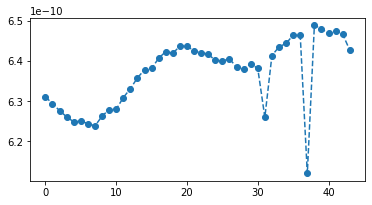

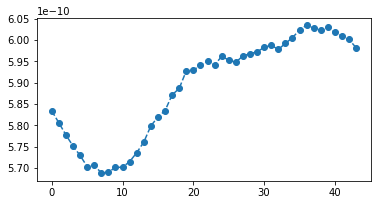

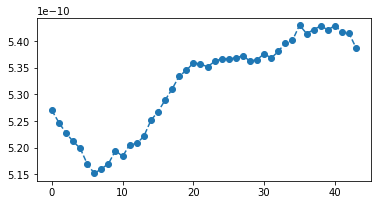

In [8]:
# Split the columns into 20 bins and aggregate (mean) within each bin
num_bins = 20

# Split the columns into 20 bins
binned_columns = np.array_split(fluxs.columns, num_bins)

binned_lams = [np.around(np.mean(a), decimals=3) for a in binned_columns]
print(binned_lams)

# Aggregate (e.g., take the mean) within each bin
binned_fluxs = np.array([fluxs.loc[:, cols].mean(axis=1) for cols in binned_columns]).T
# print(binned_fluxs)

binned_fluxs = pd.DataFrame(binned_fluxs, columns=binned_lams)
binned_fluxs

plt.figure(figsize=(6,3)), plt.plot(binned_fluxs[4.431], ls='--', marker='o')
plt.figure(figsize=(6,3)), plt.plot(binned_fluxs[4.546], ls='--', marker='o')
plt.figure(figsize=(6,3)), plt.plot(binned_fluxs[4.661], ls='--', marker='o')

In [24]:
# Do the same for errors

# Split the columns into 20 bins
binned_columnsErr = np.array_split(errs.columns, num_bins)

# Aggregate (e.g., take the mean) within each bin
binned_errs = np.array([errs.loc[:, cols].median(axis=1) for cols in binned_columnsErr]).T
# print(binned_fluxs)

binned_errs = pd.DataFrame(binned_errs, columns=binned_lams)/binned_fluxs
binned_errs.head()

,2.932,3.047,3.163,3.278,3.393,3.508,3.623,3.738,3.853,3.969,4.084,4.200,4.316,4.431,4.546,4.661,4.777,4.892,5.008,5.123
0,0.639455,0.228677,0.403543,1.381391,1.074407,0.232478,0.078072,0.041979,0.027307,0.018411,0.015766,0.013656,0.011348,0.011322,0.011885,0.014308,0.013833,0.015133,0.016825,0.023302
1,0.670941,0.239801,0.418689,1.719048,0.873020,0.242042,0.080123,0.041964,0.027462,0.018493,0.015766,0.013702,0.011365,0.011359,0.011930,0.014359,0.013816,0.015191,0.016932,0.023208
2,0.842560,0.229482,0.409176,1.676962,0.870946,0.235473,0.078425,0.042649,0.027369,0.018553,0.015845,0.013769,0.011414,0.011386,0.011984,0.014387,0.013883,0.015173,0.016856,0.023389
3,0.748709,0.228711,0.405026,2.114162,0.870757,0.230637,0.079313,0.042323,0.027577,0.018668,0.015875,0.013770,0.011431,0.011411,0.012024,0.014390,0.013927,0.015229,0.016906,0.023292
4,0.804167,0.238793,0.429988,1.866874,0.982784,0.226215,0.079295,0.042578,0.027540,0.018677,0.015886,0.013810,0.011463,0.011433,0.012266,0.015306,0.014610,0.015242,0.016952,0.023475


Text(0.5, 0, 'Hrs')

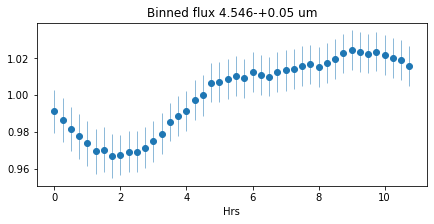

In [32]:
time, lc, elc = np.arange(fluxs.shape[0])/4, binned_fluxs[4.546], binned_errs[4.546]
lc = 1+(lc - lc.mean())/lc.max()
plt.close('all')
plt.figure(figsize=(7,3))
plt.errorbar(time, lc, yerr=elc, elinewidth=0.5, ls='', marker='o', ms=6.0)
plt.title('Binned flux 4.546-+0.05 um')
plt.xlabel('Hrs')

In [10]:
def sixsines(time, a1, p1, a2, p2, a3, p3, a4, p4, a5, p5, a6, p6, offset):
    periods = np.array([4.58, 4.68, 4.98, 5.21, 5.26, 5.34])
    om = 2*pi/periods
    
    sine1 = a1 * np.sin(om[0]*time + p1)
    sine2 = a2 * np.sin(om[1]*time + p2)
    sine3 = a3 * np.sin(om[2]*time + p3)
    sine4 = a4 * np.sin(om[3]*time + p4)
    sine5 = a5 * np.sin(om[4]*time + p5)
    sine6 = a6 * np.sin(om[5]*time + p6)
    fit = sine1 + sine2 + sine3 + sine4 + sine5 + sine6 + offset
    
    if not residual: 
        return fit
    else:
        res = np.sum( ((data-fit)/0.003)**2 )
        return (fit, res)

def threesines (time, a1, p1, a2, p2, a3, p3, offset):
    periods = np.array([4.68, 4.98, 5.26])
    om = 2*pi/periods
    
    sine1 = a1 * np.sin(om[0]*time + p1)
    sine2 = a2 * np.sin(om[1]*time + p2)
    sine3 = a3 * np.sin(om[2]*time + p3)
    fit = sine1 + sine2 + sine3
    
    return fit

# hyperOPT Decision Tree

In [11]:
import sys
import tarfile

# Monkey-patch backports.tarfile to use the standard tarfile module
sys.modules['backports.tarfile'] = tarfile

import sklearn 
from sklearn.metrics import mean_squared_error, r2_score
from hyperopt import hp, tpe, Trials, fmin
# import time
pi = np.pi

In [12]:
# choose time subset
tlow, thigh = time[0], time[-1]
subset = lc

periods3 = np.array([6.0, 6.0, 12.0])
om3 = 2*pi/periods3
w1, w2, w3 = om3[0], om3[1], om3[2]
print(w1, w2, w3)
print(0.3*w1, 0.3*w2, 0.3*w3)

# known_freq = True # prescribe 3 known freq
known_freq = False # guess freq from fit

if known_freq:
    w1, w2, w3

1.0471975511965976 1.0471975511965976 0.5235987755982988
0.31415926535897926 0.31415926535897926 0.15707963267948963


In [13]:
# random split the data into train and test
x_data = time
y_data = lc

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=42)

if known_freq:
    def objective(a0, a1, f1, a2, f2, a3, f3):
        """Objective function to minimize"""
        w1, w2, w3 = om3[0], om3[1], om3[2]
        return np.mean((a0+ a1 * np.sin(w1*X_train + f1) + a2 * np.sin(w2*X_train + f2) + a3 * np.sin(w3*X_train + f3) - y_train)**2)
    
    def objective2(args):
        return objective(*args)
else:
    def objective(a0, a1, f1, a2, f2, a3, f3, w1, w2, w3):
        """Objective function to minimize"""
        return np.mean((a0+ a1 * np.sin(w1*X_train + f1) + a2 * np.sin(w2*X_train + f2) + a3 * np.sin(w3*X_train + f3) - y_train)**2)

    def objective2(args):
        return objective(*args)

seed = 12345512
np.random.seed(seed)

In [14]:
from hyperopt import hp, tpe, Trials, fmin
from IPython.display import display, Math
bounds = [[0, 2],
          [0, 0.1],
          [-np.pi, np.pi],
          [0, 0.1],
          [-np.pi, np.pi],
          [0, 0.1],
          [-np.pi, np.pi],
          [0.4, 0.6],
          [0.4, 0.6],
          [0.9, 1.1]]

if known_freq:
    space = [hp.uniform('a0', bounds[0][0], bounds[0][1]),
             hp.uniform('a1', bounds[1][0], bounds[1][1]), 
             hp.uniform('f1', bounds[2][0], bounds[2][1]),
             hp.uniform('a2', bounds[3][0], bounds[3][1]), 
             hp.uniform('f2', bounds[4][0], bounds[4][1]),
             hp.uniform('a3', bounds[5][0], bounds[5][1]), 
             hp.uniform('f3', bounds[6][0], bounds[6][1])]
else:
    space = [hp.uniform('a0', bounds[0][0], bounds[0][1]),
             hp.uniform('a1', bounds[1][0], bounds[1][1]), 
             hp.uniform('f1', bounds[2][0], bounds[2][1]),
             hp.uniform('a2', bounds[3][0], bounds[3][1]), 
             hp.uniform('f2', bounds[4][0], bounds[4][1]),
             hp.uniform('a3', bounds[5][0], bounds[5][1]), 
             hp.uniform('f3', bounds[6][0], bounds[6][1]),
             hp.uniform('w1', bounds[7][0], bounds[7][1]),
             hp.uniform('w2', bounds[8][0], bounds[8][1]),
             hp.uniform('w3', bounds[9][0], bounds[9][1])]

In [15]:
tpe_algo = tpe.suggest
tpe_trials = Trials()

tpe_best = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=5000, rstate=np.random.default_rng(seed))

if known_freq:
    print('Prescribed frequency')
    display(Math('\\omega_1={:.2f}, \\omega_2={:.2f}, \\omega_3={:.2f}'.format(*[w1, w2, w3])))

    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}'.format(**tpe_best)))
else:
    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}, \\omega_1={w1:.2f}, \\omega_2={w2:.2f}, \\omega_3={w3:.2f}'.format(**tpe_best)))

100%|█| 5000/5000 [04:07<00:00, 20.20trial/s, best loss: 2.0536757927016607e-0
Fitted parameters:


<IPython.core.display.Math object>

mse: 2.4670459634253736e-05
r2: 0.9407046333552934
Fitted parameters:


<IPython.core.display.Math object>

14.382, 12.776, 6.391
0.437, 0.492, 0.983
{'a0': 1.0030626236781328, 'a1': 0.07063657638186457, 'a2': 0.092738020458876, 'a3': 0.017816119425977637, 'f1': 1.0523770396705356, 'f2': -2.4474300594884144, 'f3': -2.7082210618466154, 'w1': 0.43687486730008723, 'w2': 0.49180962817186724, 'w3': 0.9832060218518874}


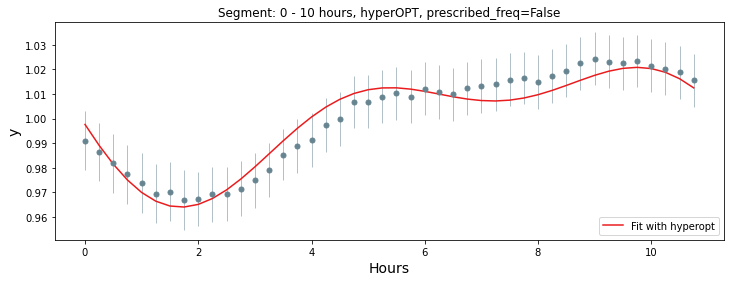

In [34]:
# Test
from sklearn.metrics import mean_squared_error, r2_score

x_data = time
y_data = lc
y_errors = elc
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=42)

if known_freq:
    ypred = tpe_best['a0']+ tpe_best['a1'] * np.sin(w1 * X_test + tpe_best['f1']) +tpe_best['a2'] * np.sin(w2 * X_test + tpe_best['f2']) +tpe_best['a3'] * np.sin(w3 * X_test + tpe_best['f3'])
    y = tpe_best['a0'] + tpe_best['a1'] * np.sin(w1* x_data + tpe_best['f1']) + tpe_best['a2'] * np.sin(w2 * x_data + tpe_best['f2']) + tpe_best['a3'] * np.sin(w3 * x_data + tpe_best['f3'])
else:
    ypred = tpe_best['a0']+ tpe_best['a1'] * np.sin(tpe_best['w1'] * X_test + tpe_best['f1']) +tpe_best['a2'] * np.sin(tpe_best['w2'] * X_test + tpe_best['f2']) +tpe_best['a3'] * np.sin(tpe_best['w3'] * X_test + tpe_best['f3'])
    y =  tpe_best['a0'] + tpe_best['a1'] * np.sin(tpe_best['w1']* x_data + tpe_best['f1']) + tpe_best['a2'] * np.sin(tpe_best['w2'] * x_data + tpe_best['f2']) + tpe_best['a3'] * np.sin(tpe_best['w3'] * x_data + tpe_best['f3'])    
    
rmse = mean_squared_error(y_test,ypred)
r2 = r2_score(y_test,ypred)
print('mse:', rmse)
print('r2:',r2)

fig, ax = plt.subplots(figsize=(12,4))
ax.errorbar(x_data, y_data, yerr=elc, elinewidth=0.5, color= '#678491', ls='', marker='o', ms=5)
ax.plot(x_data, y, label= 'Fit with hyperopt', color='#EA1B1D')
# plt.ylim((0.9, 1.1))
ax.set_ylabel('y', fontsize= 14)
ax.set_xlabel('Hours', fontsize= 14)
plt.legend(loc='lower right')
plt.title('Segment: %i - %i hours, hyperOPT, prescribed_freq=%s'%(tlow, thigh, known_freq))

if known_freq:
    print('Prescribed frequency')
    display(Math('\\omega_1={:.2f}, \\omega_2={:.2f}, \\omega_3={:.2f}'.format(*[w1, w2, w3])))

    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}'.format(**tpe_best)))
else:
    w1, w2, w3 = tpe_best['w1'], tpe_best['w2'], tpe_best['w3']
    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}, \\omega_1={w1:.2f}, \\omega_2={w2:.2f}, \\omega_3={w3:.2f}'.format(**tpe_best)))
    
print('%.3f, %.3f, %.3f'%(2*pi/w1, 2*pi/w2, 2*pi/w3))
print('%.3f, %.3f, %.3f'%(w1, w2, w3))
print(tpe_best)

In [35]:
#### Write the light curve metadata to be used in subsequent MCMC steps.

write = True
#write = False

if write:
    fitinfo = tpe_best.copy()
    for i, key in enumerate(tpe_best):
        val = fitinfo[key]
        list = [val]
        list.append(bounds[i])
        fitinfo[key] = list
    fitinfo['hr'] = tlow, thigh
    fitinfo['known_freq'] = known_freq

    handle_code = 'hyperOPT'
    fitinfo['code'] = handle_code
    if known_freq: handle_case = 'limFreq'
    else: handle_case = 'freeFreq'

    folder = join(homedir,'lightCurveFit_metadata')
    filename = '%s_sector3637_%i_%i-hr_%s_fitMeta.pkl'%(handle_code, tlow, thigh, handle_case)

    import pickle

    with open(join(folder, filename), 'wb') as file:
        pickle.dump(fitinfo, file, protocol=pickle.HIGHEST_PROTOCOL)

    with open(join(folder, filename), 'rb') as file:
        b = pickle.load(file)
    print(b == fitinfo)
    b

True
